<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 03 - Practical exercise - Ground-based I

### About

> Let us now return to the dust event in March 2022. As you recall, the dust outbreak lasted for a week from 15 to 22 March 2022 and extended across the Mediterranean Sea up as far as northern Europe. ([Source](https://www.eumetsat.int/widespread-dust-intrusion-across-europe))
> 
> Today, you will focus on station observations from [European Environmental Agency (EEA) AirBase](https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8) and lidar data from [European Aerosol Research Lidar Network (EARLINET)](https://www.earlinet.org/index.php?id=125). You will look for a dust transport signal in the EARLINET data and evaluate the evolution of this dust event over time at a specific location, with EEA ground-based data for air quality.




### Tasks

#### 1. Brainstorm
  * What ground-based observation datasets do you know about?
  * Which variables do they measure?
  * What are some advantages and limitations of ground-based data?

#### 2. Download and plot the 532nm particle depolarization profiles EARLINET data for *Granada, Spain*
  * Download and visualise 532nm particle depolarization profiles at the station *Granada, Spain* for 19 to 20 March 2022.
  * **Some questions to reflect on**
    * Between 15-22 March 2022, which days do we have observations for?
    * Why may data not be available for the whole period?
  * **Hint** 
    * [EARLINET observations - Example notebook](../04_data_workflows/42_groundbased_observations/422_EARLINET.ipynb)
    * Data access: [EARLINET Data Portal](https://data.earlinet.org/earlinet/)
    * Example code has been provided but you have to fill in the blanks.
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()`
    * To filter columns, you can either use the pandas method [filter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html) or [query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

#### 3. Load, browse and visualise 532nm backscatter EARLINET data for Granada, Spain
  * Modify the example code from the previous section to visualise the 532nm particle depolarization profiles for the same station and times.

#### 4. [BONUS] Plot the backscatter climatological average profile for the March 2000-2019 period for *Granada, Spain*
  * **Hint**
    * Data access: Download the *Level 3 Profiles* data at [EARLINET Level 3 climatological dataset](https://www.earlinet.org/index.php?id=319)
    * The acronym for Granada is `gra` which is the name of the folder containing the station data.
    * Use the normal monthly dataset, selecting the month of March. The file has `NorMon` in the filename.
  * **Question to reflect on**
    * Try adding the March climatological average profile to the backscatter plots you made in Part 3. 
    * What can you conclude about the March 2022 dust event when comparing with the climatological average profile? 

#### 5. Write a code cell for downloading EEA Air Quality data for PM10 for Spain in 2022
  * Note that EEA Air Quality data takes a long time to download as the entire country's data is downloaded. Thus, we have pre-downloaded this data for you. You simply need to check that your code cell matches the solution for this download call.
  * **Hint** 
    * [EEA Air Quality - Example notebook](../04_data_workflows/42_groundbased_observations/423_EEA_Air_Quality.ipynb)


#### 6. Plot the PM10 for the month of March 2022 for *Granada, Spain*
  * Use the map below to look for the closest PM10 station to Granada, Spain. 
  * Take note of the `AirQualityStationEoICode` or station code of this station.
  * This exercise focuses only on PM10. The closest PM2.5 station is `VÍZNAR` but it has no available data for this time period.

In [1]:
%%HTML

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1RRfBHto5r5Z-01wZIXe62dqQWbUR9c5b&ehbc=2E312F" width="640" height="480"></iframe>


#### 5. Interpret the plotting results.
  * Was the PM10 air quality threshold exceeded at *Granada, Spain* during this dust event?
  * Compare the backscatter and particle depolarisation profiles from March 2022 with the long-term climatological profile. What are your conclusions?
  * Compare these ground-based data with the SEVIRI Dust RGB [online](https://sds-was.aemet.es/forecast-products/dust-observations/msg-2013-eumetsat) and the MODIS Natural Colour RGB [online](https://go.nasa.gov/3WTHjOW). Why is it a good idea to use both ground-based and satellite observations together?

### Module outline
* [1 - Download and plot the 532nm particle depolarization profiles EARLINET data for Granada, Spain](#particle)
* [2 - Load, browse and visualise 532nm backscatter EARLINET data for Granada, Spain](#backscatter)
* [3 - BONUS: Download and plot the backscatter climatological average profile for the March 2000-2019 period for *Granada, Spain*](#climatology)
* [4 - Write code for downloading EEA Air Quality data for PM10 for Spain in 2022](#eea_download)
* [5 - Plot the PM10 and PM2.5 data for the month of March 2022 for Granada, Spain](#eea_plot)


<hr>

##### Load required libraries

In [1]:
import wget
import numpy as np
import pandas as pd
import xarray as xr
import airbase

import matplotlib.pyplot as plt

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='particle'></a>1. Download and plot the 532nm particle depolarization profiles EARLINET data for Granada, Spain

#### Load 532nm EARLINET data on 19 March 2022

EARLINET 532nm data is downloaded in a zip archive and for this reason, we have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see 20 new files appearing in a new folder called `earlinet` located in the same folder as this notebook. This is just for demonstration purposes.

In [3]:
import zipfile
with zipfile.ZipFile('./Data/Earlinet/DATASET_1910.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

EARLINET data are disseminated as hourly files in the `NetCDF` format. You can use the Python package [xarray](http://xarray.pydata.org/en/stable/) and the function `open_mfdataset()` to open multiple `NetCDF` at once, concatenating along the `time` dimension. Let us load the data files for the EARLINET station Granada, Spain for 19 March 2022.

The function loads the data as `Dataset`, which is a collection of multiple data variables that share the same coordinate information. Below, you see that the EARLINET data have four dimensions: `altitude`, `time`, `nv` and `wavelength`.

The data also hold 30 data variables, including a variable `backscatter`, which is the variable of interest for us. If you want to use the files you downloaded, please change the file path below.

In [7]:
earlinet_1903 = xr.open_mfdataset('./Data/Earlinet/*20220319*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_1903

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 11, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:43Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203190200_202203...
    overlap_correction_file:

In [100]:
earlinet_1903.time_bounds.time

<xarray.DataArray 'time' (time: 11)>
array(['2022-03-19T02:00:15.000000000', '2022-03-19T05:00:29.000000256',
       '2022-03-19T06:00:32.999999488', '2022-03-19T08:00:43.000000256',
       '2022-03-19T09:00:57.000000256', '2022-03-19T10:00:55.999999744',
       '2022-03-19T18:17:27.000000256', '2022-03-19T19:00:42.999999744',
       '2022-03-19T20:00:42.000000000', '2022-03-19T22:00:39.999999744',
       '2022-03-19T23:00:39.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2022-03-19T02:00:15 ... 2022-03-19T23:00:39
    longitude  float32 -3.605
    latitude   float32 37.16
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      time
    standard_name:  time

EARLINET Lidar sensors create vertical profiles of the atmosphere. Let us inspect the variable `altitude` in order to see the resolution and extent of the vertical profile. You see that the EARLINET 532nm data offer measurements for every 60 meters from 1370m up to 10.55km.

In [8]:
earlinet_1903.time

<xarray.DataArray 'time' (time: 11)>
array(['2022-03-19T02:00:15.000000000', '2022-03-19T05:00:29.000000256',
       '2022-03-19T06:00:32.999999488', '2022-03-19T08:00:43.000000256',
       '2022-03-19T09:00:57.000000256', '2022-03-19T10:00:55.999999744',
       '2022-03-19T18:17:27.000000256', '2022-03-19T19:00:42.999999744',
       '2022-03-19T20:00:42.000000000', '2022-03-19T22:00:39.999999744',
       '2022-03-19T23:00:39.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2022-03-19T02:00:15 ... 2022-03-19T23:00:39
    longitude  float32 -3.605
    latitude   float32 37.16
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      time
    standard_name:  time

#### Load 532nm EARLINET data on 20 March 2022

Let us now also load the 532nm EARLINET data for the station in Granada, Spain for 20th March 2022 respectively. We repeat the same steps as above. First, we load the 532nm EARLINET data as xarray.Dataset with the function `open_mfdataset()`.

In [10]:
earlinet_2003 = xr.open_mfdataset('./Data/Earlinet/*20220320*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_2003

<xarray.Dataset>
Dimensions:                                         (altitude: 156, time: 9, nv: 2, wavelength: 1)
Coordinates:
  * altitude                                        (altitude) float64 1.37e+...
  * time                                            (time) datetime64[ns] 202...
  * wavelength                                      (wavelength) float32 532.0
    longitude                                       float32 -3.605
    latitude                                        float32 37.16
Dimensions without coordinates: nv
Data variables: (12/30)
    time_bounds                                     (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    backscatter_calibration_value                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    error_retrieval_method                          (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_evaluation_method                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    backscatter_calibration_range_search_algorithm  (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    elastic_backscatter_algorithm                   (time, wavelength) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                                              ...
    earlinet_product_type                           (time) float64 6.0 ... 6.0
    user_defined_category                           (time) float64 0.0 ... 0.0
    backscatter_calibration_range                   (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    backscatter_calibration_search_range            (time, wavelength, nv) float32 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    cloud_mask_type                                 (time) float64 0.0 ... 0.0
    scc_product_type                                (time) float64 1.0 ... 1.0
Attributes: (12/35)
    Conventions:                          CF-1.7
    title:                                Profiles of aerosol optical properties
    source:                               Ground based LIDAR measurements
    references:                           Project website at http://www.earli...
    history:                              2022-03-29T07:42Z : Assigned versio...
    station_ID:                           gra
    ...                                   ...
    scc_version_description:              SCC vers. 5.2.3 (HiRELPP vers. 1.1....
    processor_name:                       ELDA
    processor_version:                    3.4.8
    __file_format_version:                2.1
    input_file:                           gra_008_0000669_202203200100_202203...
    overlap_correction_file:

#### Load and browse 532nm particle depolarization profiles on 19 and 20 March 2022

The first step is to select the variable of interest which is `particledepolarization`. You will notice that it has 3 dimensions, namely `wavelength`, `time` and `altitude`.

In [11]:
particle_1903 = earlinet_1903.particledepolarization
particle_1903

<xarray.DataArray 'particledepolarization' (wavelength: 1, time: 11, altitude: 156)>
dask.array<concatenate, shape=(1, 11, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-19T02:00:15 ... 2022-03-19T23:0...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    long_name:     aerosol linear depolarization ratio
    plausibility:  parameter not quality assured by EARLINET.
    units:         1

In [15]:
particle_2003 = earlinet_2003.particledepolarization
particle_2003

<xarray.DataArray 'particledepolarization' (wavelength: 1, time: 9, altitude: 156)>
dask.array<concatenate, shape=(1, 9, 156), dtype=float64, chunksize=(1, 1, 156), chunktype=numpy.ndarray>
Coordinates:
  * altitude    (altitude) float64 1.37e+03 1.43e+03 ... 1.061e+04 1.067e+04
  * time        (time) datetime64[ns] 2022-03-20T01:00:36.999999744 ... 2022-...
  * wavelength  (wavelength) float32 532.0
    longitude   float32 -3.605
    latitude    float32 37.16
Attributes:
    long_name:     aerosol linear depolarization ratio
    plausibility:  parameter not quality assured by EARLINET.
    units:         1

You can save the variables `particle_longname` for plotting later.

In [12]:
particle_longname = earlinet_1903.particledepolarization.long_name
particle_longname

'aerosol linear depolarization ratio'

Next, you will plot the profiles as a line chart for the following dates and times: 
   * 19 March 2022:
       * 08:00 UTC
       * 18:17 UTC
       * 23:00 UTC
   * 20 March 2022:
       * 06:00 UTC
       * 12:00 UTC
       * 17:00 UTC

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [16]:
particle_1903_df = particle_1903.to_dataframe()
particle_2003_df = particle_2003.to_dataframe()
particle_1903_df

longitude   latitude  \
wavelength time                altitude                         
532.0      2022-03-19 02:00:15 1370.0       -3.605  37.164001   
                               1430.0       -3.605  37.164001   
                               1490.0       -3.605  37.164001   
                               1550.0       -3.605  37.164001   
                               1610.0       -3.605  37.164001   
...                                            ...        ...   
           2022-03-19 23:00:39 10430.0      -3.605  37.164001   
                               10490.0      -3.605  37.164001   
                               10550.0      -3.605  37.164001   
                               10610.0      -3.605  37.164001   
                               10670.0      -3.605  37.164001   

                                         particledepolarization  
wavelength time                altitude                          
532.0      2022-03-19 02:00:15 1370.0                       NaN  
                               1430.0                       NaN  
                               1490.0                       NaN  
                               1550.0                       NaN  
                               1610.0                       NaN  
...                                                         ...  
           2022-03-19 23:00:39 10430.0                      NaN  
                               10490.0                      NaN  
                               10550.0                      NaN  
                               10610.0                      NaN  
                               10670.0                      NaN  

[1716 rows x 3 columns]

Next, you can filter for the three times on 19 March 2022 that will plot, namely 08:00 UTC, 18:00 UTC and 23:00 UTC.

In [26]:
#particle_1903_0800_df = particle_1903_df.filter(like='08:00', axis=0)
#particle_1903_0800_df
# Reset multiindex
particle_1903_df_sidx = particle_1903_df.reset_index(level=[0,2])
particle_2003_df_sidx =  particle_2003_df.reset_index(level=[0,2])

In [44]:
# Select data on 19 Mar
start_t = pd.to_datetime(['2022-03-19 08:00', '2022-03-19 18:00', '2022-03-19 23:00'])
end_t = pd.to_datetime(['2022-03-19 09:00', '2022-03-19 19:00', '2022-03-19 23:20'])
ref = particle_1903_df_sidx.index.values
i,j=np.where((ref[:,None]>=start_t.values)&(ref[:,None]<=end_t.values))
particle_1903_df_sel = particle_1903_df_sidx.iloc[i]

In [45]:
# Select data on 20 Mar
start_t = pd.to_datetime(['2022-03-20 06:00', '2022-03-20 12:00', '2022-03-20 17:00'])
end_t = pd.to_datetime(['2022-03-20 06:20', '2022-03-20 12:20', '2022-03-20 17:20'])
ref = particle_2003_df_sidx.index.values
i,j=np.where((ref[:,None]>=start_t.values)&(ref[:,None]<=end_t.values))
particle_2003_df_sel = particle_2003_df_sidx.iloc[i]

In [37]:
particle_2003_df_sel

,wavelength,altitude,longitude,latitude,particledepolarization
time,,,,,
2022-03-20 06:00:32,532.0,1370.0,-3.605,37.164001,0.094132
2022-03-20 06:00:32,532.0,1430.0,-3.605,37.164001,0.099682
2022-03-20 06:00:32,532.0,1490.0,-3.605,37.164001,0.102345
2022-03-20 06:00:32,532.0,1550.0,-3.605,37.164001,0.102812
2022-03-20 06:00:32,532.0,1610.0,-3.605,37.164001,0.109827
...,...,...,...,...,...
2022-03-20 17:00:10,532.0,10430.0,-3.605,37.164001,NaN
2022-03-20 17:00:10,532.0,10490.0,-3.605,37.164001,NaN
2022-03-20 17:00:10,532.0,10550.0,-3.605,37.164001,NaN


In [46]:
particle_2003_df_sel

,wavelength,altitude,longitude,latitude,particledepolarization
time,,,,,
2022-03-20 06:00:32,532.0,1370.0,-3.605,37.164001,0.094132
2022-03-20 06:00:32,532.0,1430.0,-3.605,37.164001,0.099682
2022-03-20 06:00:32,532.0,1490.0,-3.605,37.164001,0.102345
2022-03-20 06:00:32,532.0,1550.0,-3.605,37.164001,0.102812
2022-03-20 06:00:32,532.0,1610.0,-3.605,37.164001,0.109827
...,...,...,...,...,...
2022-03-20 17:00:10,532.0,10430.0,-3.605,37.164001,NaN
2022-03-20 17:00:10,532.0,10490.0,-3.605,37.164001,NaN
2022-03-20 17:00:10,532.0,10550.0,-3.605,37.164001,NaN


#### Visualise the 532nm particle depolarization profiles in Granada, Spain for 19 and 20 March 2022

The next step is now to visualize the six particle depolarization profiles for both days next to each other. To do so, create six subplots with with `plt.subplot()`. By specifying `(2,3,1`), we create a plot with 2 rows and 3 columns and the third number indicates that this is the first plot of three in that row.

In [63]:
#%% matplotlib parameters
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['font.size'] = 16

Text(0.5, 0.98, 'aerosol linear depolarization ratio (532nm)')

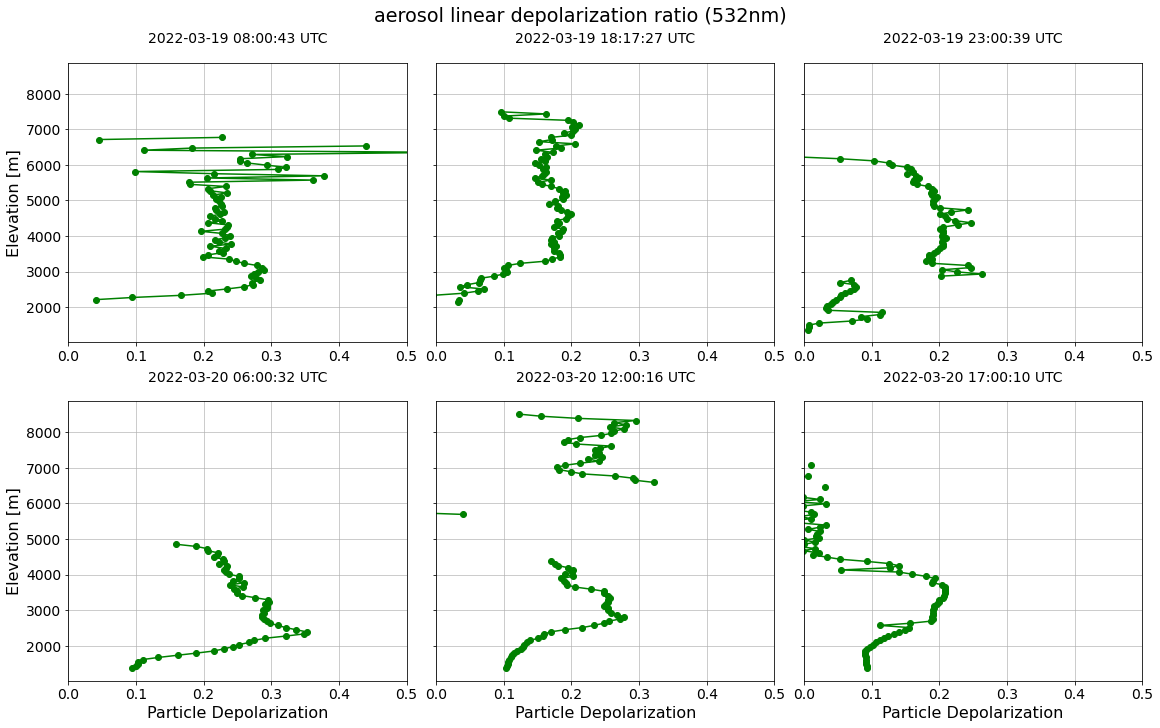

In [66]:
# Figure
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10), sharey = True, constrained_layout = True)

########################
# 19 March
########################
for j,k in enumerate(particle_1903_df_sel.index.unique()):
    axs[0,j].plot(particle_1903_df_sel.loc[k]['particledepolarization'],particle_1903_df_sel.loc[k]['altitude'],'-go')
    axs[0,j].set_title(str(k)[:19] +' UTC', fontsize=14, pad=20)
    axs[0,j].set_xlim((0,0.5))
    axs[0,j].grid(which='minor', alpha=0.2)
    axs[0,j].grid(which='major', alpha=0.8)
for j,k in enumerate(particle_2003_df_sel.index.unique()):
    axs[1,j].plot(particle_2003_df_sel.loc[k]['particledepolarization'],particle_2003_df_sel.loc[k]['altitude'],'-go')
    axs[1,j].set_title(str(k)[:19] +' UTC', fontsize=14, pad=20)
    axs[1,j].set_xlim((0,0.5))
    axs[1,j].set_xlabel('Particle Depolarization', fontsize=16)
    axs[1,j].grid(which='minor', alpha=0.2)
    axs[1,j].grid(which='major', alpha=0.8)

axs[0,0].set_ylabel('Elevation [m]', fontsize=16)
axs[1,0].set_ylabel('Elevation [m]', fontsize=16)

fig.suptitle(particle_longname + ' (532nm)')

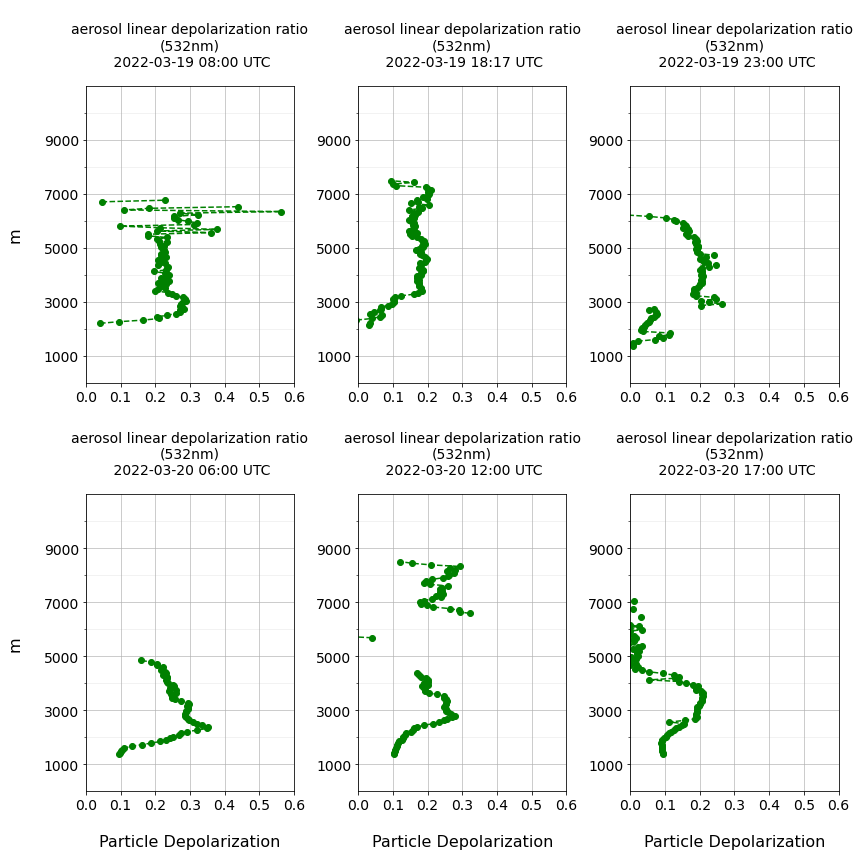

In [64]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(12,12))

########################
# 1st subplot
########################
ax1=plt.subplot(2,3,1)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax1.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax1.plot(particle_1903_0800_df['particledepolarization'], particle_1903_0800_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 08:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax1.set_yticks(major_yticks)
ax1.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.8)


########################
# 2nd subplot
########################

ax2=plt.subplot(2,3,2)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax2.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax2.plot(particle_1903_1817_df['particledepolarization'], particle_1903_1817_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 18:17 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax2.set_yticks(major_yticks)
ax2.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.8)


########################
# 3rd subplot
########################

ax3=plt.subplot(2,3,3)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax3.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax3.plot(particle_1903_2300_df['particledepolarization'], particle_1903_2300_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-19 23:00 UTC', fontsize=14, pad=20)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax3.set_yticks(major_yticks)
ax3.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.8)

########################
# 4th subplot
########################

ax4=plt.subplot(2,3,4)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax4.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax4.plot(particle_2003_0600_df['particledepolarization'], particle_2003_0600_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 06:00 UTC', fontsize=14, pad=20)
plt.ylabel(earlinet_1903.altitude.units+'\n', fontsize=16)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
major_yticks = np.arange(1000, 11000, 2000)
minor_yticks = np.arange(1000, 11000, 1000)
ax4.set_yticks(major_yticks)
ax4.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.8)


########################
# 5th subplot
########################

ax5=plt.subplot(2,3,5)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax5.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax5.plot(particle_2003_1200_df['particledepolarization'], particle_2003_1200_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 12:00 UTC', fontsize=14, pad=20)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax5.set_yticks(major_yticks)
ax5.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.8)


########################
# 6th subplot
########################

ax6=plt.subplot(2,3,6)

# Set the x and y limits by passing a list which specifies [xmin, xmax, ymin, ymax]
ax6.axis([0, 0.6, 0, 11000]);

# Select pandas dataframe columns and define a line plot for particle depolarization
ax6.plot(particle_2003_1700_df['particledepolarization'], particle_2003_1700_df.index, 'go--')

# Set title and axes lable information
plt.title('\n' + particle_longname + '\n(532nm)' + '\n 2022-03-20 17:00 UTC', fontsize=14, pad=20)
plt.xlabel('\nParticle Depolarization', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set major ticks on the y-axis every 2000, minor ticks every 1000
ax6.set_yticks(major_yticks)
ax6.set_yticks(minor_yticks, minor=True)

# Use different settings for the grids
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.8)

###########

# Set tight layout to space subplots
fig.tight_layout()

<br>

### <a id='particle'></a>2. Use the example code to plot the 532nm backscatter EARLINET data for Granada, Spain

In [69]:
# Get backscatter values
bks_1903 = earlinet_1903.backscatter
bks_2003 = earlinet_2003.backscatter
bks_longname = earlinet_1903.backscatter.long_name

# Convert to df
bks_1903_df = bks_1903.to_dataframe()
bks_2003_df = bks_2003.to_dataframe()

# Reset multiindex
bks_1903_df_sidx = bks_1903_df.reset_index(level=[0,2])
bks_2003_df_sidx =  bks_2003_df.reset_index(level=[0,2])
# Select data on 19 Mar
start_t = pd.to_datetime(['2022-03-19 08:00', '2022-03-19 18:00', '2022-03-19 23:00'])
end_t = pd.to_datetime(['2022-03-19 09:00', '2022-03-19 19:00', '2022-03-19 23:20'])
ref = bks_1903_df_sidx.index.values
i,j=np.where((ref[:,None]>=start_t.values)&(ref[:,None]<=end_t.values))
bks_1903_df_sel = bks_1903_df_sidx.iloc[i]
# Select data on 20 Mar
start_t = pd.to_datetime(['2022-03-20 06:00', '2022-03-20 12:00', '2022-03-20 17:00'])
end_t = pd.to_datetime(['2022-03-20 06:20', '2022-03-20 12:20', '2022-03-20 17:20'])
ref = bks_2003_df_sidx.index.values
i,j=np.where((ref[:,None]>=start_t.values)&(ref[:,None]<=end_t.values))
bks_2003_df_sel = bks_2003_df_sidx.iloc[i]

Text(0.5, 0.98, 'aerosol backscatter coefficient (532nm)')

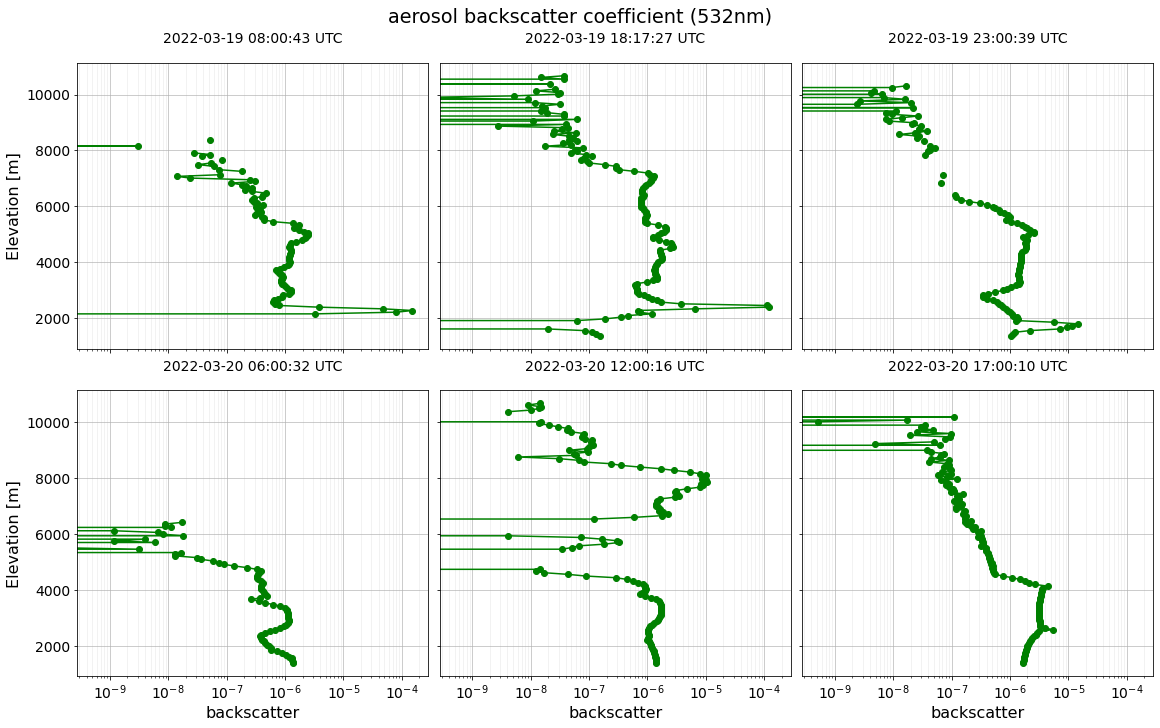

In [74]:
# Figure
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10), sharex = True, sharey = True, constrained_layout = True)

########################
# 19 March
########################
for j,k in enumerate(bks_1903_df_sel.index.unique()):
    axs[0,j].plot(bks_1903_df_sel.loc[k]['backscatter'],bks_1903_df_sel.loc[k]['altitude'],'-go')
    axs[0,j].set_title(str(k)[:19] +' UTC', fontsize=14, pad=20)
    #axs[0,j].set_xlim((0,0.5))
    axs[0,j].grid(which='minor', alpha=0.2)
    axs[0,j].grid(which='major', alpha=0.8)
for j,k in enumerate(bks_2003_df_sel.index.unique()):
    axs[1,j].plot(bks_2003_df_sel.loc[k]['backscatter'],bks_2003_df_sel.loc[k]['altitude'],'-go')
    axs[1,j].set_title(str(k)[:19] +' UTC', fontsize=14, pad=20)
    #axs[1,j].set_xlim((0,0.5))
    axs[1,j].set_xlabel('backscatter', fontsize=16)
    axs[1,j].grid(which='minor', alpha=0.2)
    axs[1,j].grid(which='major', alpha=0.8)

axs[0,0].set_xscale('log')
axs[0,0].set_ylabel('Elevation [m]', fontsize=16)
axs[1,0].set_ylabel('Elevation [m]', fontsize=16)

fig.suptitle(bks_longname + ' (532nm)')

<br>

In [97]:
# Create Dataframe
df = pd.DataFrame(index = bks_1903_df_sidx.index.unique(), columns = bks_1903_df_sidx.altitude.unique())
for j in df.index:
    df.loc[j] = bks_1903_df_sidx.loc[j].backscatter.values

df2 = pd.DataFrame(index = bks_2003_df_sidx.index.unique(), columns = bks_2003_df_sidx.altitude.unique())
for j in df2.index:
    df2.loc[j] = bks_2003_df_sidx.loc[j].backscatter.values

df = pd.concat([df,df2])

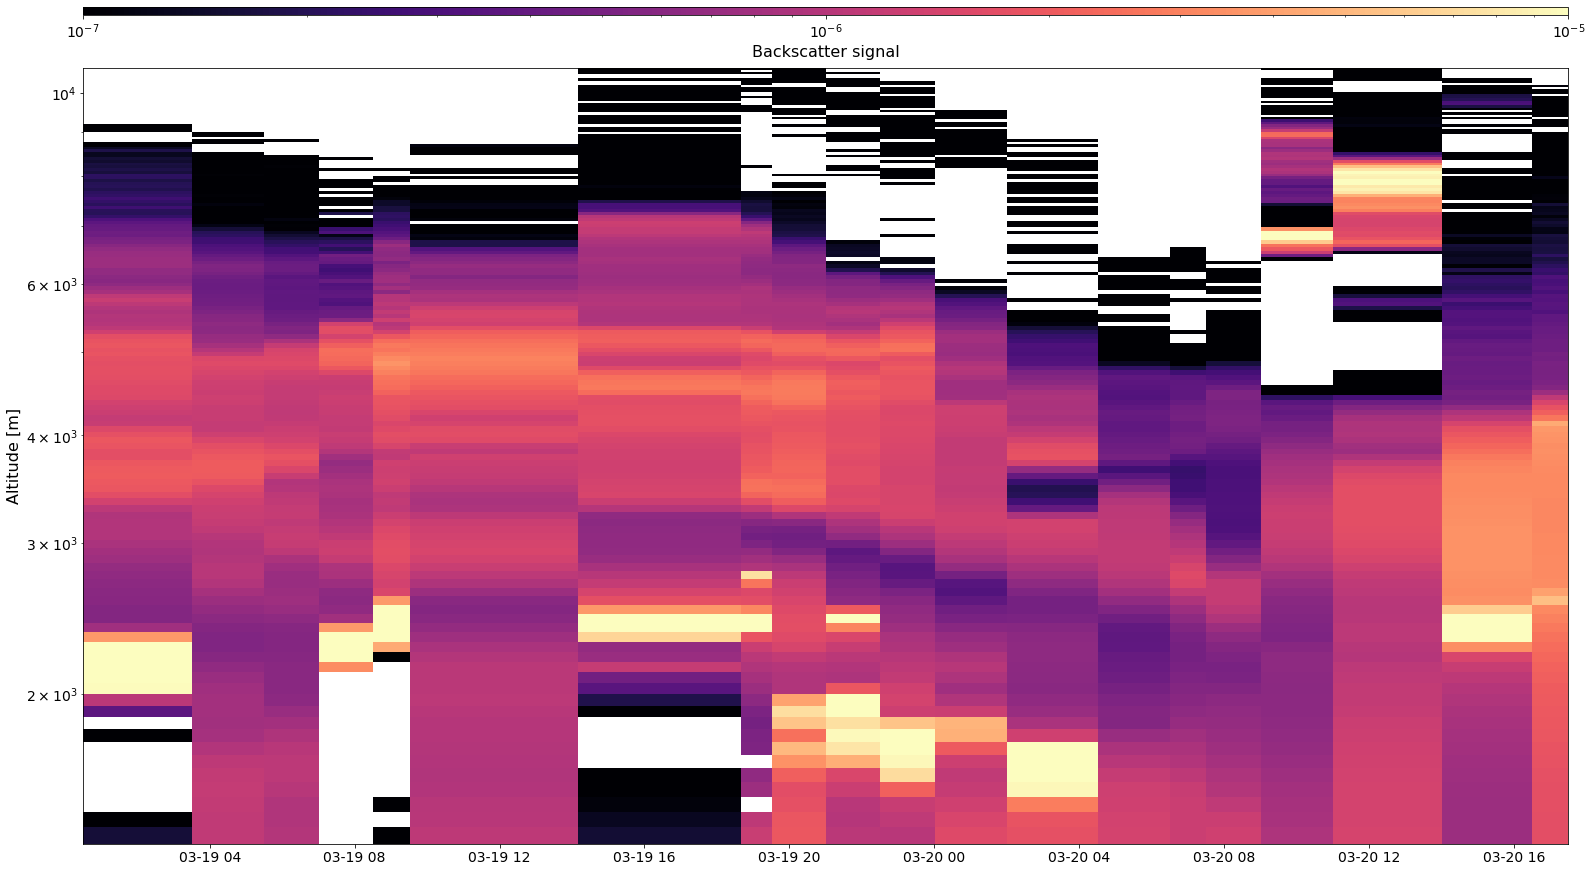

In [103]:
fig, axs = plt.subplots(figsize=(22,12),nrows=2,constrained_layout =True,
                            gridspec_kw={'height_ratios': [0.2, 20]})
    
## Lidar

pcm=axs[1].pcolormesh(df.index,df.columns.values,np.array(df.T.values, dtype = float), 
                      shading = 'nearest', norm=LogNorm(vmin = 1e-7, vmax = 1e-5),cmap='magma')
    
axs[1].set_yscale('log')
#axs[1].set_ylim((60,Lidar.columns[-1]))
axs[1].set_ylabel('Altitude [m]')

cbar = fig.colorbar(pcm, cax = axs[0], extend='neither', orientation='horizontal')
cbar.set_label('Backscatter signal')

### <a id='climatology'></a>3. [BONUS] Download and plot the climatological average profile for the March 2000-2019 period for Granada, Spain

In [104]:
# Unzip data
with zipfile.ZipFile('./Data/Earlinet/Integrated_Level3_relNov2022.zip', 'r') as zip_ref:
    zip_ref.extractall('./Data/Earlinet/')

In [109]:
# Load data
earlinet_lev3 = xr.open_mfdataset('./Data/Earlinet/Level3/gra/*Annual*.nc', 
                         concat_dim='time', 
                         combine='nested')
earlinet_lev3

<xarray.Dataset>
Dimensions:                        (nv: 2, time: 20, wavelength: 3, stats: 5, n_char: 1)
Coordinates:
  * nv                             (nv) int32 1 2
  * time                           (time) datetime64[ns] 2000-06-30T23:59:59 ...
  * wavelength                     (wavelength) float64 355.0 532.0 1.064e+03
  * stats                          (stats) int32 0 1 2 3 4
  * n_char                         (n_char) int32 1
Data variables: (12/15)
    integral_bounds                (time, nv) int8 dask.array<chunksize=(1, 2), meta=np.ndarray>
    aerosol_optical_depth          (stats, wavelength, nv, time) float64 dask.array<chunksize=(5, 3, 2, 1), meta=np.ndarray>
    integrated_backscatter         (stats, wavelength, nv, time) float64 dask.array<chunksize=(5, 3, 2, 1), meta=np.ndarray>
    lidar_ratio                    (stats, wavelength, nv, time) float64 dask.array<chunksize=(5, 3, 2, 1), meta=np.ndarray>
    aerosol_boundary_layer         (stats, time) float64 dask.array<chunksize=(5, 1), meta=np.ndarray>
    h63_of_aerosol_optical_depth   (stats, wavelength, time) float64 dask.array<chunksize=(5, 3, 1), meta=np.ndarray>
    ...                             ...
    angstrom_coefficient           (stats, nv, time) float64 dask.array<chunksize=(5, 2, 1), meta=np.ndarray>
    time_bounds                    (nv, time) datetime64[ns] dask.array<chunksize=(2, 1), meta=np.ndarray>
    latitude                       (time) float32 37.16 37.16 ... 37.16 37.16
    longitude                      (time) float32 -3.605 -3.605 ... -3.605
    source                         (time, n_char) |S1 dask.array<chunksize=(1, 1), meta=np.ndarray>
    station_altitude               (time) float32 680.0 680.0 ... 680.0 680.0
Attributes: (12/30)
    processor_name:                       EAR_clim_v1.exe
    processor_version:                    
    processor_institution:                CNR - IMAA
    system:                               
    location:                             Granada, Spain
    institution:                          Andalusian Institute for Earth Syst...
    ...                                   ...
    conventions:                          C.F. - 1.8
    references:                           link doc earlinet.org
    station_ID:                           gra
    __file_format_version:                
    history:                              2022-07-06 16:40:27Generated by fre...
    title:                                Annual average integrated measureme...

In [125]:
bks = earlinet_lev3.integrated_backscatter.to_dataframe().reset_index(level = [0,1,2])
bks = bks[bks.wavelength == 532]
bks

depo = earlinet_lev3.particle_depolarization.to_dataframe().reset_index(level = [0,1,2])
depo = depo[depo.wavelength == 532]
depo

,stats,wavelength,nv,particle_depolarization
time,,,,
2000-06-30 23:59:59,0,532.0,1,NaN
2001-06-30 23:59:59,0,532.0,1,NaN
2002-06-30 23:59:59,0,532.0,1,NaN
2003-06-30 23:59:59,0,532.0,1,NaN
2004-06-30 23:59:59,0,532.0,1,NaN
...,...,...,...,...
2015-06-30 23:59:59,4,532.0,2,0.0
2016-06-30 23:59:59,4,532.0,2,0.0
2017-06-30 23:59:59,4,532.0,2,208.0


Text(0, 0.5, 'depolarization')

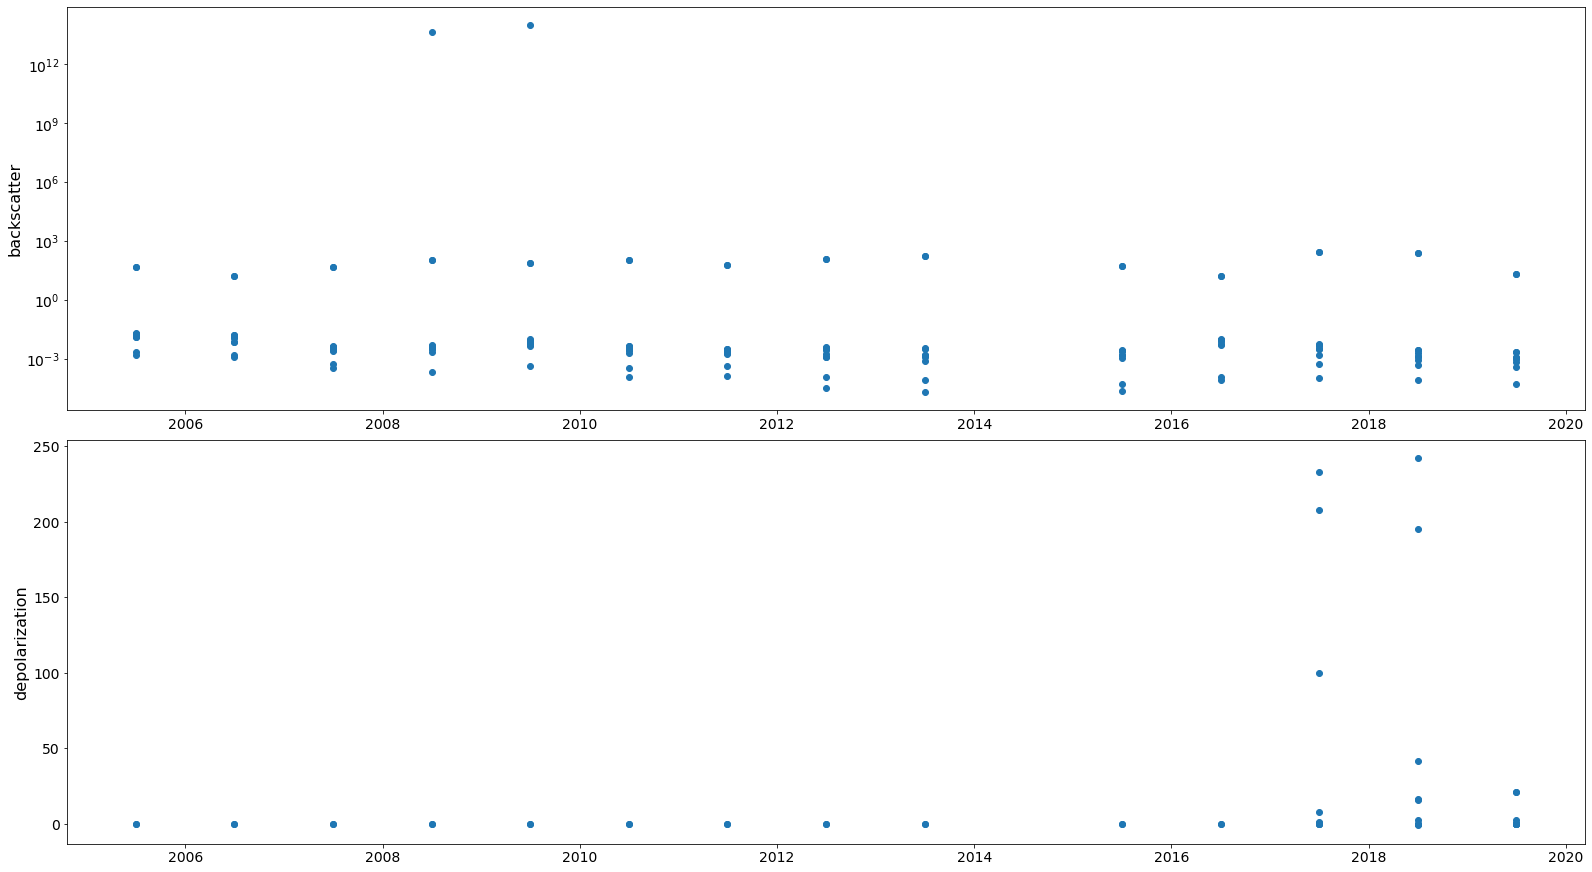

In [128]:
fig, axs = plt.subplots(figsize=(22,12),nrows=2,constrained_layout =True)
axs[0].plot(bks.index,bks.integrated_backscatter,'o')
axs[0].set_yscale('log')
axs[0].set_ylabel('backscatter')

axs[1].plot(depo.index,depo.particle_depolarization,'o')
#axs[1].set_yscale('log')
axs[1].set_ylabel('depolarization')

<hr>

### <a id='eea_download'></a>4. Write code for downloading EEA Air Quality data for PM10 for Spain in 2022

<br>

### <a id='resample_aeronet'></a>5. Plot the PM10 data for the month of March 2022 near Granada, Spain

<br>

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>